In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

# Get the all_hotels dataset from this link:  https://drive.google.com/file/d/1RBJrf-cugclChTt7FYNNRgtZY7ES0SPa/view?usp=sharing
all_hotels = pd.read_csv("/content/gdrive/MyDrive/AI/datasets/project dataset/train_set.csv", names=["image_id", "hotel_id", "image_url", "image_source", "upload_timestamp"])
# Displaying the dataset
all_hotels.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23


In [ ]:
# Get the hotels dataset from this link:  https://drive.google.com/file/d/1on3NRztK5KdGxiaC_L_ogOJl7VeuaFqe/view?usp=sharing
hotels = pd.read_csv('/content/gdrive/MyDrive/AI/datasets/170k/hotels_subset_170k_without_missing_final.csv')

In [ ]:
hotels

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number
0,3485,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,0
1,3486,18187,https://traffickcam.com/images/2016/10/2015090...,traffickcam,9/9/15 17:23,1
2,3663,73224,https://traffickcam.com/images/2016/10/2015091...,traffickcam,9/17/15 19:33,2
3,2586939,86350,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 19:12,3
4,2586950,1533,https://traffickcam.com/images/2017/2/20160125...,traffickcam,1/25/16 17:23,4
...,...,...,...,...,...,...
160046,7057086,7671,https://i.travelapi.com/hotels/1000000/50000/4...,travel_website,2019-12-19 20:39:39,169994
160047,7057087,7671,https://i.travelapi.com/hotels/1000000/50000/4...,travel_website,2019-12-19 20:39:39,169995
160048,7057088,7671,https://i.travelapi.com/hotels/1000000/50000/4...,travel_website,2019-12-19 20:39:39,169996
160049,7057089,7671,https://i.travelapi.com/hotels/1000000/50000/4...,travel_website,2019-12-19 20:39:39,169997


In [ ]:
hotels_id_dist = pd.DataFrame(hotels['hotel_id'].value_counts()).reset_index()

In [ ]:
hotels_id_dist.rename(columns={'index': 'hotel_id', 'hotel_id': 'count'}, inplace=True)

In [ ]:
hotels_id_dist

,hotel_id,count
0,6798,328
1,1240,258
2,873,244
3,5201,166
4,6611,165
...,...,...
15315,7832,1
15316,34443,1
15317,70134,1
15318,36205,1


# **Medium Dataset**

To create the medium dataset, we decided to choose hotels which have between 48-50 images. We felt that this was a good intermediate between over 100 images per hotel in the easy dataset and only a few images per hotel in the difficult dataset.

In [ ]:
medium_dataset_dist = hotels_id_dist[hotels_id_dist['count'] >= 48][hotels_id_dist['count'] <= 50]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
medium_dataset_dist

,hotel_id,count
309,5328,50
310,7606,50
311,6226,50
312,6276,50
313,3418,50
...,...,...
370,3979,48
371,6439,48
372,3275,48
373,1188,48


In [ ]:
medium_hotels_dist = medium_dataset_dist['hotel_id']

In [ ]:
medium_hotels_dist = list(medium_hotels_dist)

In [ ]:
medium_dataset_hotels = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number'])

In [ ]:
for i in range(0, len(hotels['hotel_id'])):
  if hotels['hotel_id'][i] in medium_hotels_dist:
      medium_dataset_hotels.loc[len(medium_dataset_hotels)] = [hotels['image_id'][i], hotels['hotel_id'][i],
                                               hotels['image_url'][i], hotels['image_source'][i],
                                               hotels['upload_timestamp'][i], hotels['serial_number'][i]]

In [ ]:
medium_dataset_hotels

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number
0,2593671,29934,https://traffickcam.com/images/2017/7/20160625...,traffickcam,6/25/16 18:05,1237
1,2594074,29934,https://traffickcam.com/images/2017/7/20160625...,traffickcam,6/25/16 20:22,1316
2,2596975,1324,https://traffickcam.com/images/2017/7/20160626...,traffickcam,6/26/16 18:19,1888
3,2596976,1324,https://traffickcam.com/images/2017/7/20160626...,traffickcam,6/26/16 18:19,1889
4,2597016,4241,https://traffickcam.com/images/2017/7/20160626...,traffickcam,6/26/16 18:36,1895
...,...,...,...,...,...,...
3234,6021862,7606,https://i.travelapi.com/hotels/1000000/20000/1...,travel_website,2019-12-18 19:37:53,168950
3235,6021863,7606,https://i.travelapi.com/hotels/1000000/20000/1...,travel_website,2019-12-18 19:37:53,168951
3236,6021864,7606,https://i.travelapi.com/hotels/1000000/20000/1...,travel_website,2019-12-18 19:37:53,168952
3237,6021865,7606,https://i.travelapi.com/hotels/1000000/20000/1...,travel_website,2019-12-18 19:37:53,168953


In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
medium_dataset_hotels['new_hotel_id'] = label_encoder.fit_transform(medium_dataset_hotels['hotel_id'])
medium_dataset_hotels.head()

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
0,2593671,29934,https://traffickcam.com/images/2017/7/20160625...,traffickcam,6/25/16 18:05,1237,65
1,2594074,29934,https://traffickcam.com/images/2017/7/20160625...,traffickcam,6/25/16 20:22,1316,65
2,2596975,1324,https://traffickcam.com/images/2017/7/20160626...,traffickcam,6/26/16 18:19,1888,9
3,2596976,1324,https://traffickcam.com/images/2017/7/20160626...,traffickcam,6/26/16 18:19,1889,9
4,2597016,4241,https://traffickcam.com/images/2017/7/20160626...,traffickcam,6/26/16 18:36,1895,42


In [ ]:
medium_dataset_hotels_20perc = medium_dataset_hotels.groupby('hotel_id', group_keys=False).apply(lambda x: x.sample(frac=0.2))

In [ ]:
medium_dataset_hotels_20perc

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
172,7165261,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46303,0
187,7165278,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46318,0
166,7165255,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46297,0
194,7165285,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46325,0
181,7165272,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46312,0
...,...,...,...,...,...,...,...
38,2647483,29934,https://traffickcam.com/images/2017/10/2016090...,traffickcam,9/5/16 12:01,10517,65
20,2623415,29934,https://traffickcam.com/images/2017/8/20160719...,traffickcam,7/19/16 1:16,6801,65
85,3834199,29934,https://traffickcam.com/images/2018/4/20170319...,traffickcam,3/19/17 21:39,21433,65
149,3960165,29934,https://traffickcam.com/images/2019/9/20180820...,traffickcam,8/20/18 15:43,44335,65


In [ ]:
medium_dataset_hotels_validation = medium_dataset_hotels_20perc.groupby('hotel_id', group_keys=False).apply(lambda x: x.sample(frac=0.5))

In [ ]:
medium_dataset_hotels_validation

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
194,7165285,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46325,0
166,7165255,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46297,0
153,7165242,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46284,0
178,7165267,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46309,0
155,7165244,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46286,0
...,...,...,...,...,...,...,...
125,3914081,29934,https://traffickcam.com/images/2019/2/20180103...,traffickcam,1/3/18 23:17,35960,65
66,2673130,29934,https://traffickcam.com/images/2017/12/2016112...,traffickcam,11/28/16 23:16,15464,65
85,3834199,29934,https://traffickcam.com/images/2018/4/20170319...,traffickcam,3/19/17 21:39,21433,65
38,2647483,29934,https://traffickcam.com/images/2017/10/2016090...,traffickcam,9/5/16 12:01,10517,65


In [ ]:
medium_dataset_hotels_test = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number', 'new_hotel_id'])

In [ ]:
for i in range(0, len(medium_dataset_hotels_20perc['hotel_id'])):
    if medium_dataset_hotels_20perc.iloc[i]['serial_number'] not in list(medium_dataset_hotels_validation['serial_number']):
      medium_dataset_hotels_test.loc[len(medium_dataset_hotels_test)] = [medium_dataset_hotels_20perc.iloc[i]['image_id'], medium_dataset_hotels_20perc.iloc[i]['hotel_id'],
                                                       medium_dataset_hotels_20perc.iloc[i]['image_url'], medium_dataset_hotels_20perc.iloc[i]['image_source'],
                                                        medium_dataset_hotels_20perc.iloc[i]['upload_timestamp'], medium_dataset_hotels_20perc.iloc[i]['serial_number'],
                                                       medium_dataset_hotels_20perc.iloc[i]['new_hotel_id']]

In [ ]:
medium_dataset_hotels_test

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
0,7165261,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46303,0
1,7165278,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46318,0
2,7165272,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46312,0
3,7165288,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46328,0
4,7165282,468,https://i.travelapi.com/hotels/1000000/120000/...,travel_website,2019-12-19 23:37:38,46322,0
...,...,...,...,...,...,...,...
325,3960167,29934,https://traffickcam.com/images/2019/9/20180820...,traffickcam,8/20/18 15:43,44337,65
326,2652101,29934,https://traffickcam.com/images/2017/10/2016091...,traffickcam,9/19/16 19:05,11447,65
327,2623415,29934,https://traffickcam.com/images/2017/8/20160719...,traffickcam,7/19/16 1:16,6801,65
328,3960165,29934,https://traffickcam.com/images/2019/9/20180820...,traffickcam,8/20/18 15:43,44335,65


In [ ]:
medium_dataset_hotels_train = pd.DataFrame(columns=['image_id','hotel_id','image_url','image_source','upload_timestamp', 'serial_number', 'new_hotel_id'])

In [ ]:
for i in range(0, len(medium_dataset_hotels['hotel_id'])):
    if medium_dataset_hotels.iloc[i]['serial_number'] not in list(medium_dataset_hotels_20perc['serial_number']):
      medium_dataset_hotels_train.loc[len(medium_dataset_hotels_train)] = [medium_dataset_hotels.iloc[i]['image_id'], medium_dataset_hotels.iloc[i]['hotel_id'],
                                                           medium_dataset_hotels.iloc[i]['image_url'], medium_dataset_hotels.iloc[i]['image_source'],
                                                           medium_dataset_hotels.iloc[i]['upload_timestamp'], medium_dataset_hotels.iloc[i]['serial_number'],
                                                           medium_dataset_hotels.iloc[i]['new_hotel_id']]

In [ ]:
medium_dataset_hotels_train

,image_id,hotel_id,image_url,image_source,upload_timestamp,serial_number,new_hotel_id
0,2593671,29934,https://traffickcam.com/images/2017/7/20160625...,traffickcam,6/25/16 18:05,1237,65
1,2594074,29934,https://traffickcam.com/images/2017/7/20160625...,traffickcam,6/25/16 20:22,1316,65
2,2596975,1324,https://traffickcam.com/images/2017/7/20160626...,traffickcam,6/26/16 18:19,1888,9
3,2596976,1324,https://traffickcam.com/images/2017/7/20160626...,traffickcam,6/26/16 18:19,1889,9
4,2598281,6461,https://traffickcam.com/images/2017/7/20160627...,traffickcam,6/27/16 5:38,2127,60
...,...,...,...,...,...,...,...
2574,6021862,7606,https://i.travelapi.com/hotels/1000000/20000/1...,travel_website,2019-12-18 19:37:53,168950,64
2575,6021863,7606,https://i.travelapi.com/hotels/1000000/20000/1...,travel_website,2019-12-18 19:37:53,168951,64
2576,6021864,7606,https://i.travelapi.com/hotels/1000000/20000/1...,travel_website,2019-12-18 19:37:53,168952,64
2577,6021865,7606,https://i.travelapi.com/hotels/1000000/20000/1...,travel_website,2019-12-18 19:37:53,168953,64


Note: In case you do not want to perform all this preprocessing to get the datasets, we have saved these datasets in csvs for ready use.
The links are as follows:

*   medium_dataset_hotels: https://drive.google.com/file/d/1e8mX57OZfcOumel7S3sKK_12Bbou-Mb1/view?usp=sharing
*   medium_dataset_hotels_train: https://drive.google.com/file/d/1-hDnt4C94U8VcUW1asr_-OZq_7bV1aNw/view?usp=sharing
*   medium_dataset_hotels_test: https://drive.google.com/file/d/1pRhVFNefdZoTzC6EyeH0ikBDiy13rsfn/view?usp=sharing
*   medium_dataset_hotels_validation: https://drive.google.com/file/d/1Fxs0VswUE1XbVbVDzsdkpKAy6KNFujij/view?usp=sharing

In [ ]:
import urllib.request

# Loads image from a url
def loadImage(URL, image_num):
  with urllib.request.urlopen(URL) as url:
    with open(f'/content/gdrive/MyDrive/AI/Medium Dataset Hotel Images/img{image_num}.jpg', 'wb') as f:
      f.write(url.read())

Uploading images in medium_dataset_hotels to drive.
The i values printed in the exception correspond to those images whose links have become disfunctional

In [ ]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from keras.preprocessing.image import load_img

for i in range(len(medium_dataset_hotels['image_url'])):
    try: 
      image_url = medium_dataset_hotels['image_url'][i]
      serial_number = medium_dataset_hotels['serial_number'][i]
      loadImage(image_url, serial_number)
    except:
      print(i)

594
598
602
612
616
925
931
937
945
956
958
1347
1348
1350
1351


To remove the missing images from our three datasets, we are first mapping the i value to the serial number and storing the serial numbers in a list.
We are also storing the class corresponding to the serial number in the train, validation and test lists if they belong there. 

In [ ]:
missing_images_i = [594,598,602,612,616,925,931,937,945,956,958,1347,1348,1350,1351]
missing_images_serial_number = []
missing_images_class = []
missing_images_class_train = []
missing_images_class_test = []
missing_images_class_validation = []

In [ ]:
for i in missing_images_i:
  serial_number = medium_dataset_hotels['serial_number'][i]
  missing_images_serial_number.append(serial_number)
  if serial_number in list(medium_dataset_hotels_train['serial_number']):
    missing_images_class_train.append(medium_dataset_hotels['new_hotel_id'][i])
  elif serial_number in list(medium_dataset_hotels_test['serial_number']):
    missing_images_class_test.append(medium_dataset_hotels['new_hotel_id'][i])
  elif serial_number in list(medium_dataset_hotels_validation['serial_number']):
    missing_images_class_validation.append(medium_dataset_hotels['new_hotel_id'][i])
  
  missing_images_class.append(medium_dataset_hotels['new_hotel_id'][i])

# **We will apply our three models to the medium dataset**

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
train_imgs = []
for i in range(0, len(medium_dataset_hotels_train['hotel_id'])):
  serial_number =  medium_dataset_hotels_train['serial_number'][i]
  # If the image is missing, skip it
  if serial_number in missing_images_serial_number:
    continue
  image = img_to_array(load_img(f'/content/gdrive/MyDrive/AI/Medium Dataset Hotel Images/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  train_imgs.append(image)

  if (i % 1000 == 0):
    print(i)

0
1000
2000


In [ ]:
validation_imgs = []
for i in range(0, len(medium_dataset_hotels_validation['hotel_id'])):
  serial_number = medium_dataset_hotels_validation.iloc[i]['serial_number']
  # If the image is missing, skip it
  if serial_number in missing_images_serial_number:
    continue
  image = img_to_array(load_img(f'/content/gdrive/MyDrive/AI/Medium Dataset Hotel Images/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  validation_imgs.append(image)
  
  if (i % 100 == 0):
    print(i)

0
100
200
300


In [ ]:
test_imgs = []
for i in range(0, len(medium_dataset_hotels_test['hotel_id'])):
  serial_number = medium_dataset_hotels_test['serial_number'][i]
  # If the image is missing, skip it
  if serial_number in missing_images_serial_number:
    continue
  image = img_to_array(load_img(f'/content/gdrive/MyDrive/AI/Medium Dataset Hotel Images/img{serial_number}.jpg', target_size=(224, 224)))
  image = preprocess_input(image)
  test_imgs.append(image)
  
  if (i % 100 == 0):
    print(i)

0
100
200
300


In [ ]:
import numpy as np

train_imgs = np.array(train_imgs)
validation_imgs = np.array(validation_imgs)
test_imgs = np.array(test_imgs)

In [ ]:
train_labels = list(medium_dataset_hotels_train['new_hotel_id'])
validation_labels = list(medium_dataset_hotels_validation['new_hotel_id'])
test_labels = list(medium_dataset_hotels_test['new_hotel_id'])

In [ ]:
# Removing the class corresponding to the missing images from the
# labels list of train, test and validation
for missing_class in missing_images_class_train:
  train_labels.remove(missing_class)

for missing_class in missing_images_class_validation:
  validation_labels.remove(missing_class)

for missing_class in missing_images_class_test:
  test_labels.remove(missing_class)

In [ ]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
validation_labels = to_categorical(validation_labels)

The medium dataset has 66 classes.

In [ ]:
train_labels.shape

(2566, 66)

In [ ]:
test_labels.shape

(328, 66)

In [ ]:
validation_labels.shape

(330, 66)

# **Plotting Graph**

In [ ]:
from matplotlib import pyplot

def summarize_model(history):
	# plot loss during training
  pyplot.figure(figsize=(8,6))
  pyplot.subplot(211)
  pyplot.title('Loss')
  pyplot.plot(history.history['loss'], label='train')
  pyplot.plot(history.history['val_loss'], label='test')
  pyplot.legend()
  # plot accuracy during training
  pyplot.subplot(212)
  pyplot.title('Accuracy')
  pyplot.plot(history.history['accuracy'], label='train')
  pyplot.plot(history.history['val_accuracy'], label='test')
  pyplot.legend()
  pyplot.show()

# **Model 1**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras import optimizers
import keras

model_1 = Sequential()
input_t = Input(shape = (224,224,3))
pretrained_model= ResNet50(include_top=False,
                           input_tensor=input_t, 
                   pooling='avg',classes= 50,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
model_1.add(pretrained_model)
model_1.add(Flatten())
model_1.add(Dense(512, activation='relu', input_dim = (224,224,3)))
output = model_1.add(Dense(66, activation='softmax'))
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_2 (Flatten)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               1049088   
                                                                 
 dense_5 (Dense)             (None, 66)                33858     
                                                                 
Total params: 24,670,658
Trainable params: 1,082,946
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_1_10 = model_1.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 43s 3s/step - loss: 4.2041 - accuracy: 0.0729 - val_loss: 3.6268 - val_accuracy: 0.1485
Epoch 2/10
10/10 [==============================] - 16s 2s/step - loss: 2.8793 - accuracy: 0.3648 - val_loss: 2.8789 - val_accuracy: 0.3697
Epoch 3/10
10/10 [==============================] - 17s 2s/step - loss: 1.9641 - accuracy: 0.5678 - val_loss: 2.3827 - val_accuracy: 0.4545
Epoch 4/10
10/10 [==============================] - 16s 2s/step - loss: 1.3670 - accuracy: 0.7089 - val_loss: 2.0934 - val_accuracy: 0.5152
Epoch 5/10
10/10 [==============================] - 17s 2s/step - loss: 0.9602 - accuracy: 0.8110 - val_loss: 1.8830 - val_accuracy: 0.5455
Epoch 6/10
10/10 [==============================] - 16s 2s/step - loss: 0.6902 - accuracy: 0.8807 - val_loss: 1.8391 - val_accuracy: 0.5606
Epoch 7/10
10/10 [==============================] - 16s 2s/step - loss: 0.5255 - accuracy: 0.9178 - val_loss: 1.7849 - val_accuracy: 0.5848
Epoch 8/10
10/10 [==

In [ ]:
testLoss, testAccuracy = model_1.evaluate(test_imgs, test_labels)

11/11 [==============================] - 3s 258ms/step - loss: 1.5894 - accuracy: 0.6402


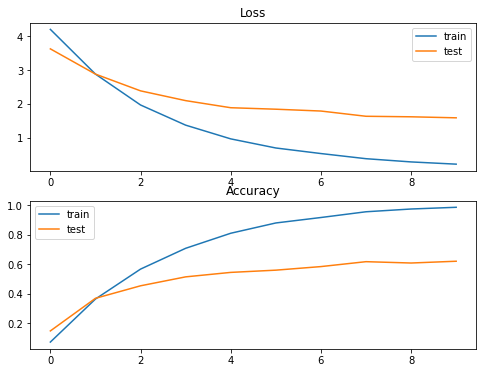

In [ ]:
summarize_model(history_1_10)

In [ ]:
history_1_20 = model_1.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=20, verbose=1)

Epoch 1/20
10/10 [==============================] - 25s 2s/step - loss: 4.1366 - accuracy: 0.0799 - val_loss: 3.5356 - val_accuracy: 0.2212
Epoch 2/20
10/10 [==============================] - 16s 2s/step - loss: 2.8319 - accuracy: 0.3827 - val_loss: 2.8304 - val_accuracy: 0.3485
Epoch 3/20
10/10 [==============================] - 16s 2s/step - loss: 1.9461 - accuracy: 0.5838 - val_loss: 2.3595 - val_accuracy: 0.4818
Epoch 4/20
10/10 [==============================] - 17s 2s/step - loss: 1.3976 - accuracy: 0.7097 - val_loss: 2.0879 - val_accuracy: 0.5182
Epoch 5/20
10/10 [==============================] - 16s 2s/step - loss: 0.9758 - accuracy: 0.8114 - val_loss: 1.8818 - val_accuracy: 0.5515
Epoch 6/20
10/10 [==============================] - 16s 2s/step - loss: 0.7195 - accuracy: 0.8745 - val_loss: 1.7763 - val_accuracy: 0.5818
Epoch 7/20
10/10 [==============================] - 16s 2s/step - loss: 0.5452 - accuracy: 0.9162 - val_loss: 1.6826 - val_accuracy: 0.6121
Epoch 8/20
10/10 [==

In [ ]:
testLoss, testAccuracy = model_1.evaluate(test_imgs, test_labels)

11/11 [==============================] - 2s 204ms/step - loss: 1.5068 - accuracy: 0.6402


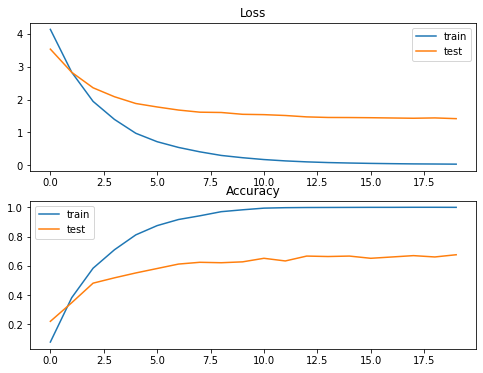

In [ ]:
summarize_model(history_1_20)

# **Model 2**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras import Input
from tensorflow.keras import optimizers
import keras

model_2 = Sequential()
input_t = Input(shape = (224,224,3))
pretrained_model= ResNet50(include_top=False,
                           input_tensor=input_t, 
                   pooling='avg',classes= 50,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False
model_2.add(pretrained_model)
model_2.add(Flatten())
model_2.add(Dense(512, activation='relu'))
model_2.add(Dense(1024, activation='relu', input_dim = (224,224,3)))
output = model_2.add(Dense(66, activation='softmax'))
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1024)              525312    
                                                                 
 dense_2 (Dense)             (None, 66)                67650     
                                                                 
Total params: 25,229,762
Trainable params: 1,642,050
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history_2_10 = model_2.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=10, verbose=1)

Epoch 1/10
10/10 [==============================] - 42s 3s/step - loss: 4.0797 - accuracy: 0.0826 - val_loss: 3.5989 - val_accuracy: 0.2030
Epoch 2/10
10/10 [==============================] - 16s 2s/step - loss: 2.9099 - accuracy: 0.3445 - val_loss: 2.7541 - val_accuracy: 0.3848
Epoch 3/10
10/10 [==============================] - 16s 2s/step - loss: 1.8935 - accuracy: 0.5472 - val_loss: 2.3327 - val_accuracy: 0.4364
Epoch 4/10
10/10 [==============================] - 16s 2s/step - loss: 1.2632 - accuracy: 0.6984 - val_loss: 1.9792 - val_accuracy: 0.5182
Epoch 5/10
10/10 [==============================] - 16s 2s/step - loss: 0.8605 - accuracy: 0.8020 - val_loss: 1.8895 - val_accuracy: 0.5424
Epoch 6/10
10/10 [==============================] - 16s 2s/step - loss: 0.5655 - accuracy: 0.8800 - val_loss: 1.7640 - val_accuracy: 0.5636
Epoch 7/10
10/10 [==============================] - 16s 2s/step - loss: 0.3713 - accuracy: 0.9299 - val_loss: 1.6982 - val_accuracy: 0.5727
Epoch 8/10
10/10 [==

In [ ]:
testLoss, testAccuracy = model_2.evaluate(test_imgs, test_labels)

11/11 [==============================] - 3s 259ms/step - loss: 1.7579 - accuracy: 0.6006


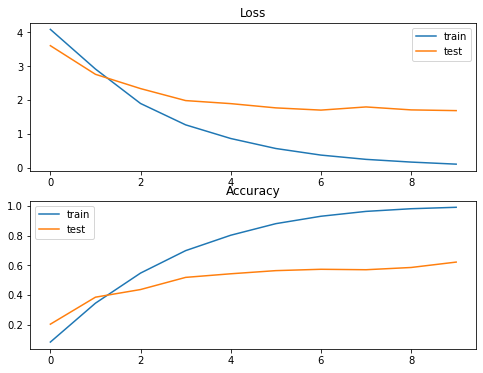

In [ ]:
summarize_model(history_2_10)

In [ ]:
history_2_20 = model_2.fit(x = train_imgs, y = train_labels, validation_data=(validation_imgs, validation_labels), steps_per_epoch=10, epochs=20, verbose=1)

Epoch 1/20
10/10 [==============================] - 16s 2s/step - loss: 0.0645 - accuracy: 0.9988 - val_loss: 1.6505 - val_accuracy: 0.6394
Epoch 2/20
10/10 [==============================] - 16s 2s/step - loss: 0.0413 - accuracy: 0.9992 - val_loss: 1.6432 - val_accuracy: 0.6182
Epoch 3/20
10/10 [==============================] - 16s 2s/step - loss: 0.0290 - accuracy: 0.9992 - val_loss: 1.6678 - val_accuracy: 0.6303
Epoch 4/20
10/10 [==============================] - 16s 2s/step - loss: 0.0237 - accuracy: 0.9992 - val_loss: 1.6660 - val_accuracy: 0.6273
Epoch 5/20
10/10 [==============================] - 16s 2s/step - loss: 0.0209 - accuracy: 0.9992 - val_loss: 1.6999 - val_accuracy: 0.6394
Epoch 6/20
10/10 [==============================] - 16s 2s/step - loss: 0.0142 - accuracy: 0.9992 - val_loss: 1.6509 - val_accuracy: 0.6364
Epoch 7/20
10/10 [==============================] - 16s 2s/step - loss: 0.0117 - accuracy: 0.9996 - val_loss: 1.6648 - val_accuracy: 0.6303
Epoch 8/20
10/10 [==

In [ ]:
testLoss, testAccuracy = model_2.evaluate(test_imgs, test_labels)

11/11 [==============================] - 2s 195ms/step - loss: 1.7770 - accuracy: 0.6524


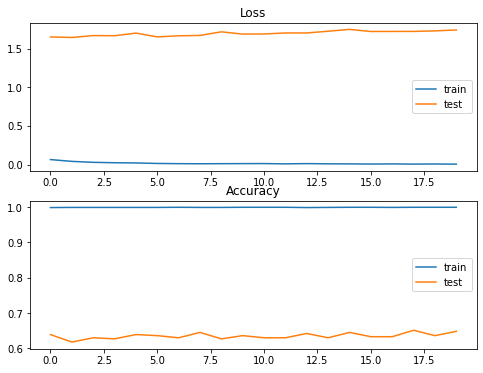

In [ ]:
summarize_model(history_2_20)